# Aerosol specification

Contributed by Abigail Williams and Lynn Russell


---

## Overview
The aerosol specification is a parameterized particle size distribution (PSD) made up of three lognormal modes:

|     |Mode 1 | Mode 2 | Mode 3 |
|-----|-------|--------|--------|
|**N<sub>a</sub> (mg<sup>-1</sup>)** | 45.7 | 105.5 | 1.6 |
|**D<sub>g</sub> ($\mu$m)** | 0.04 | 0.14 | 0.50 |
|**$\sigma$<sub>g</sub>** | 1.7 | 1.6 | 1.7 |
|**Kappa** | 0.3 | 0.5 | 0.9 |

The above values are modal fits to the median aerosol PSD measured at Zeppelin Observatory in Svalbard (~1000 km upwind of COMBLE) during March-May 2020. We refer to this size distribution as PSD<sub>ZSM</sub> where ZSM stands for Zeppelin-Observatory Springtime Median. Kappa values are informed by the analysis of filter measurements of aerosol composition at Zeppelin Observatory and HTDMA measurements during COMBLE.

Let's plot PSD<sub>ZSM</sub> below.

---

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read data from Google Sheets
The PSD<sub>ZSM</sub> parameters are stored in a google sheet <a href="https://docs.google.com/spreadsheets/d/1q4YkJc5dF-ZOIx-xWU_IkmTYCUPoM0kODj5ro_7Vg_c/edit?usp=sharing">here</a>. Let's read in that data.

In [3]:
PSD_zsm = pd.read_excel('https://docs.google.com/spreadsheets/d/' +
                        '1q4YkJc5dF-ZOIx-xWU_IkmTYCUPoM0kODj5ro_7Vg_c' +
                        '/export?gid=0&format=xlsx',
                        sheet_name='PSD')
PSD_zsm

,Mode,N_a,D_g,sigma_g,kappa
0,Aitken,58,0.04,1.7,0.3
1,Accumulation,134,0.14,1.6,0.5
2,Sea Spray,2,0.50,1.7,0.9


## Calculate the size distribution
The lognormal distribution described by the above modal parameters is defined by the equation below (following *Seinfeld and Pandis 2016*):

$$
n(D) = \frac{dN}{dD} = \frac{N}{(2\pi)^{0.5}\log_{10}\sigma_g}exp(-\frac{(\log_{10}D - \log_{10}D_g)^{0.5}}{2\log_{10}^2\sigma_g})
$$

Let's calculate the size distribution corresponding to the PSD<sub>ZSM</sub> parameters.

In [4]:
#create a diameter array
D = np.logspace(-2, 1, num=100)

#calculate lognormal mode number size distribution
PSD_mode1 = np.multiply(np.divide(PSD_zsm.at[0, 'N_a'], (np.sqrt(2 * np.pi) * np.log10(PSD_zsm.at[0, 'sigma_g']))), \
                        np.exp(-(np.square(np.subtract(np.log10(D), np.log10(PSD_zsm.at[0, 'D_g'])))) \
                               / (2 * np.square(np.log10(PSD_zsm.at[0, 'sigma_g'])))))
PSD_mode2 = np.multiply(np.divide(PSD_zsm.at[1, 'N_a'], (np.sqrt(2 * np.pi) * np.log10(PSD_zsm.at[1, 'sigma_g']))), \
                        np.exp(-(np.square(np.subtract(np.log10(D), np.log10(PSD_zsm.at[1, 'D_g'])))) / \
                               (2 * np.square(np.log10(PSD_zsm.at[1, 'sigma_g'])))))
PSD_mode3 = np.multiply(np.divide(PSD_zsm.at[2, 'N_a'], (np.sqrt(2 * np.pi) * np.log10(PSD_zsm.at[2, 'sigma_g']))), \
                        np.exp(-(np.square(np.subtract(np.log10(D), np.log10(PSD_zsm.at[2, 'D_g'])))) / \
                               (2 * np.square(np.log10(PSD_zsm.at[2, 'sigma_g'])))))

#sum three individual lognormal modes together to make a single tri-modal size distribution
PSD_sum = PSD_mode1 + PSD_mode2 + PSD_mode3

## Plot the PSD

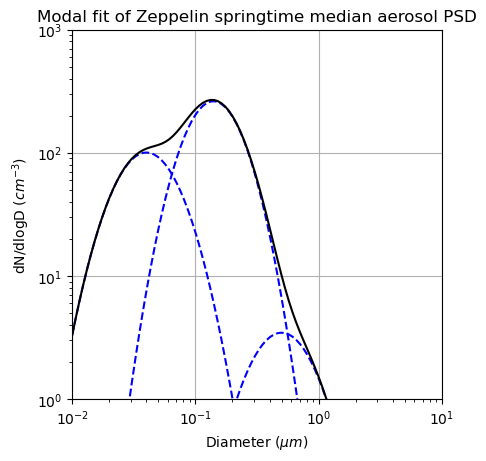

In [8]:
plt.plot(D, PSD_mode1, '--b')
plt.plot(D, PSD_mode2, '--b')
plt.plot(D, PSD_mode3, '--b')
plt.plot(D, PSD_sum, 'k')
plt.axis('square')
plt.yscale('log')
plt.xscale('log')
plt.xlim([1e-2, 1e1])
plt.ylim([1e0, 1e3])
plt.grid()
plt.xlabel('Diameter $(\mu m)$')
plt.ylabel('dN/dlogD $(cm^{-3})$')
plt.title('Modal fit of Zeppelin springtime median aerosol PSD')
plt.show()

---

## References
- We thank Radovan Krejci, Paul Zieger, and Peter Tunved for supplying the dataset of aerosol measurements taken at Zeppelin Observatory.

- A manuscript detailing aerosol characteristics during cold-air outbreaks around the Norwegian Sea is currently in preparation (Williams et al., *in prep*). This manuscript further describes the observations and methods used to derive the above parameters for the modal fit to the springtime median aerosol PSD at Zeppelin Observatory. 